<a href="https://colab.research.google.com/github/TriPhantom/2023_2T_AWD_TW22/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the data
excel_data = pd.read_excel('2100-Data.xls')
# Read the values of the file in the dataframe
df = pd.DataFrame(excel_data, columns=['Competition_with_peers', 'Teacher_academic_performance', 'Unrealistic_expectations_teacher', 'Unrealistic_expectations_parents', 'Time_allocation_enough', 'Workload_excessive', 'Work_assignment_too_much', 'Catch_up', 'Enough_time_relax', 'Exam_difficult', 'Exam_too_short', 'Exam_time_stressful', 'Successful_student', 'Successful_career', 'Academic_decisions', 'Failing_courses', 'Weakness_char', 'Pass_exams', 'Score_pas', 'Target'])
df['Target']=df.Target
print("The content of the file is:\n", df)

The content of the file is:
       Competition_with_peers  Teacher_academic_performance  \
0                          4                             1   
1                          1                             3   
2                          1                             1   
3                          3                             1   
4                          5                             2   
...                      ...                           ...   
2095                       4                             4   
2096                       3                             5   
2097                       5                             4   
2098                       5                             5   
2099                       5                             5   

      Unrealistic_expectations_teacher  Unrealistic_expectations_parents  \
0                                    2                                 2   
1                                    2                                 1  

In [ ]:
df.shape

(2100, 20)

In [ ]:
df.isnull().sum()

,0
Competition_with_peers,0
Teacher_academic_performance,0
Unrealistic_expectations_teacher,0
Unrealistic_expectations_parents,0
Time_allocation_enough,0
Workload_excessive,0
Work_assignment_too_much,0
Catch_up,0
Enough_time_relax,0
Exam_difficult,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Competition_with_peers,2100.0,3.030952,1.401182,1.0,2.0,3.0,4.0,5.0
Teacher_academic_performance,2100.0,3.015238,1.388634,1.0,2.0,3.0,4.0,5.0
Unrealistic_expectations_teacher,2100.0,3.055714,1.396327,1.0,2.0,3.0,4.0,5.0
Unrealistic_expectations_parents,2100.0,3.045238,1.417696,1.0,2.0,3.0,4.0,5.0
Time_allocation_enough,2100.0,3.103810,1.378624,1.0,2.0,3.0,4.0,5.0
Workload_excessive,2100.0,3.090952,1.394816,1.0,2.0,3.0,4.0,5.0
Work_assignment_too_much,2100.0,3.107619,1.387633,1.0,2.0,3.0,4.0,5.0
Catch_up,2100.0,3.072857,1.378708,1.0,2.0,3.0,4.0,5.0
Enough_time_relax,2100.0,3.032381,1.384560,1.0,2.0,3.0,4.0,5.0
Exam_difficult,2100.0,3.088571,1.401613,1.0,2.0,3.0,4.0,5.0


In [ ]:
feature_cols = ['Competition_with_peers', 'Teacher_academic_performance', 'Unrealistic_expectations_teacher', 'Unrealistic_expectations_parents', 'Time_allocation_enough', 'Workload_excessive', 'Work_assignment_too_much', 'Catch_up', 'Enough_time_relax', 'Exam_difficult', 'Exam_too_short', 'Exam_time_stressful', 'Successful_student', 'Successful_career', 'Academic_decisions', 'Failing_courses', 'Weakness_char', 'Pass_exams']
X = df[feature_cols]  # Features
y = df['Target']  # Target variable

For Assignment 1

*Decision Tree*

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% test

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [ ]:
# display the performance of Decision-Tree
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.8301587301587302


In [ ]:
# Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       203
         Low       0.74      0.78      0.76       217
    Moderate       0.76      0.72      0.74       210

    accuracy                           0.83       630
   macro avg       0.83      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630



In [ ]:
print('Confusion Matrix - Train:', '\n', confusion_matrix(y_train, y_pred_train))
print('\n', 'Confusion Matrix - Test:', '\n', confusion_matrix(y_test, y_pred))

Confusion Matrix - Train: 
 [[497   0   0]
 [  0 483   0]
 [  0   0 490]]

 Confusion Matrix - Test: 
 [[203   0   0]
 [  0 169  48]
 [  1  58 151]]


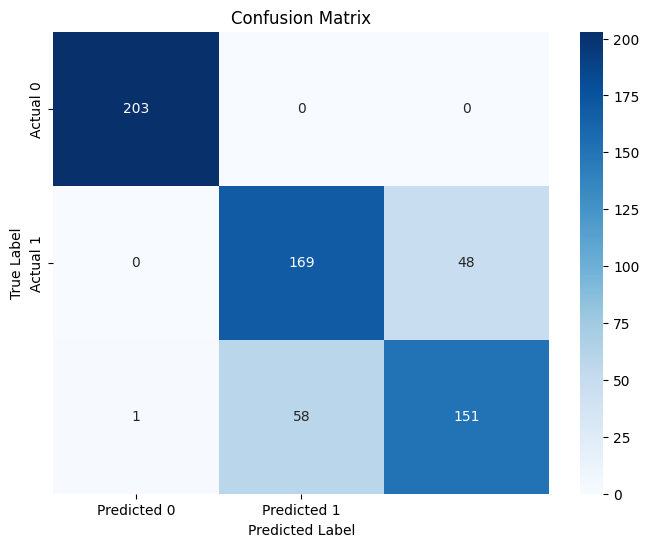

In [ ]:
# prompt: create visualization for the confusion matrix above

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from the previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

*Naïve Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

*Support Vector Machine (SVM)*

In [ ]:
from sklearn.svm import SVC
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

*GridSearchCV for Hyperparameter Settings*

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


*Classification Reports*

In [ ]:
# Print classification reports for all models
print("\nDecision Tree:\n", classification_report(y_test, y_pred))
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nNaive Bayes:\n", classification_report(y_test, y_pred_nb))
print("\nSupport Vector Machine:\n", classification_report(y_test, y_pred_svm))


Decision Tree:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       203
         Low       0.74      0.78      0.76       217
    Moderate       0.76      0.72      0.74       210

    accuracy                           0.83       630
   macro avg       0.83      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630


Logistic Regression:
               precision    recall  f1-score   support

        High       0.97      0.98      0.97       203
         Low       0.99      1.00      0.99       217
    Moderate       0.98      0.95      0.97       210

    accuracy                           0.98       630
   macro avg       0.98      0.98      0.98       630
weighted avg       0.98      0.98      0.98       630


Naive Bayes:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       203
         Low       0.90      1.00      0.95       217
    Moderate       1

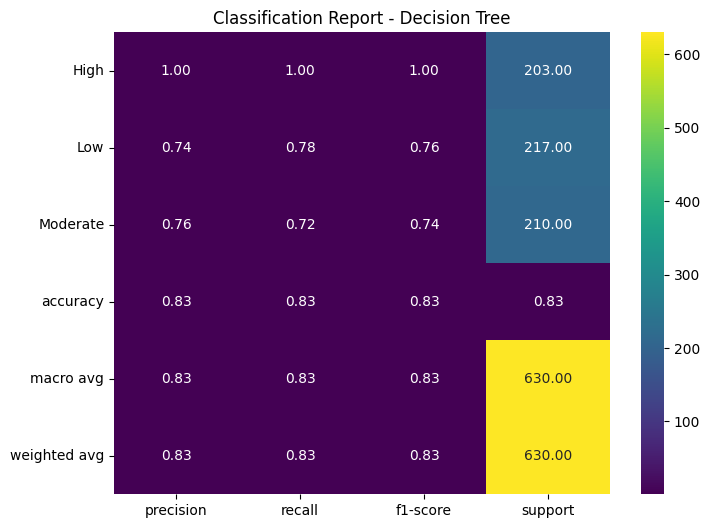

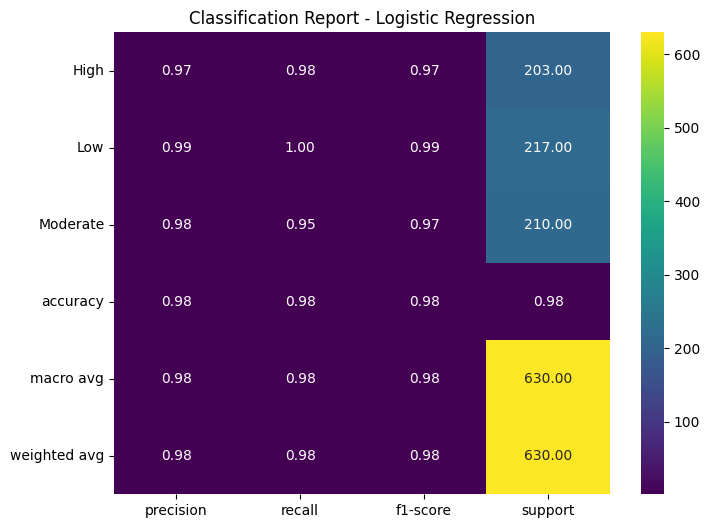

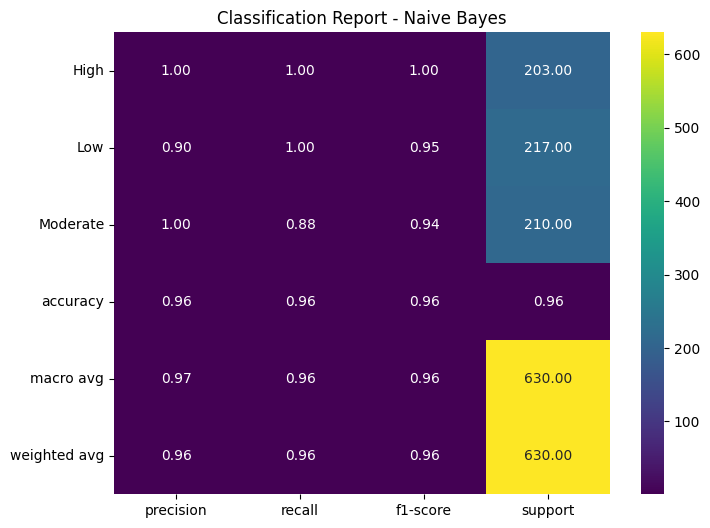

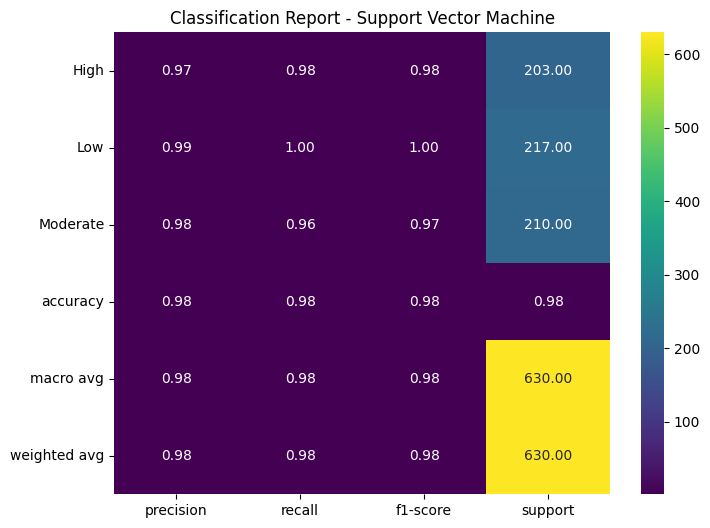

In [ ]:
# prompt: create visualization for thecode above
# Print classification reports for all models
# print("\nDecision Tree:\n", classification_report(y_test, y_pred))
# print("\nLogistic Regression:\n", classification_report(y_test, y_pred_lr))
# print("\nNaive Bayes:\n", classification_report(y_test, y_pred_nb))
# print("\nSupport Vector Machine:\n", classification_report(y_test, y_pred_svm))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_classification_report(y_true, y_pred, model_name):
    """Plots a classification report as a heatmap."""

    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report[['precision', 'recall', 'f1-score', 'support']], annot=True, fmt=".2f", cmap="viridis")
    plt.title(f"Classification Report - {model_name}")
    plt.show()

# Assuming y_test, y_pred, y_pred_lr, y_pred_nb, and y_pred_svm are defined from your code

# Plot for Decision Tree
plot_classification_report(y_test, y_pred, "Decision Tree")

# Plot for Logistic Regression
plot_classification_report(y_test, y_pred_lr, "Logistic Regression")

# Plot for Naive Bayes
plot_classification_report(y_test, y_pred_nb, "Naive Bayes")

# Plot for Support Vector Machine
plot_classification_report(y_test, y_pred_svm, "Support Vector Machine")